<a href="https://colab.research.google.com/github/vishwas8055-git/storage-cost-analysis/blob/main/storage_cost_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
os.listdir()

['.config', 'sample_data']

In [4]:
import os
os.listdir()

['.config', 'sample_data']

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Nat_Gas.csv to Nat_Gas.csv


In [6]:
import os
os.listdir()

['.config', 'Nat_Gas.csv', 'sample_data']

In [7]:
import pandas as pd
df = pd.read_csv("Nat_Gas.csv")
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [8]:
df["Dates"]=pd.to_datetime(df['Dates'])
df=df.sort_values('Dates')
df.head()

/tmp/ipython-input-322559127.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dates"]=pd.to_datetime(df['Dates'])


,Dates,Prices
0,2020-10-31,10.1
1,2020-11-30,10.3
2,2020-12-31,11.0
3,2021-01-31,10.9
4,2021-02-28,10.9


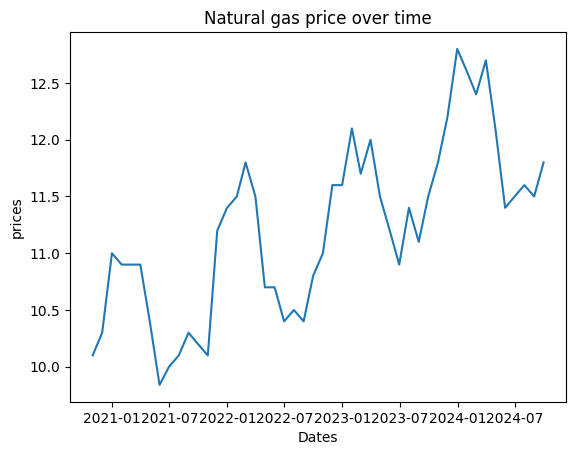

In [9]:
import matplotlib.pyplot as plt
plt.plot(df['Dates'],df['Prices'])
plt.title("Natural gas price over time")
plt.xlabel("Dates")
plt.ylabel("prices")
plt.show()

In [10]:
import numpy as np
df['Time']=np.arange(len(df))
df.head()

,Dates,Prices,Time
0,2020-10-31,10.1,0
1,2020-11-30,10.3,1
2,2020-12-31,11.0,2
3,2021-01-31,10.9,3
4,2021-02-28,10.9,4


In [11]:
df['Month'] = df['Dates'].dt.month

df['Sin_Month'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Cos_Month'] = np.cos(2 * np.pi * df['Month'] / 12)

df.head()


,Dates,Prices,Time,Month,Sin_Month,Cos_Month
0,2020-10-31,10.1,0,10,-8.660254e-01,0.500000
1,2020-11-30,10.3,1,11,-5.000000e-01,0.866025
2,2020-12-31,11.0,2,12,-2.449294e-16,1.000000
3,2021-01-31,10.9,3,1,5.000000e-01,0.866025
4,2021-02-28,10.9,4,2,8.660254e-01,0.500000


In [12]:
from sklearn.linear_model import LinearRegression

# Select features
X = df[['Time', 'Sin_Month', 'Cos_Month']]
y = df['Prices']

# Train model
model = LinearRegression()
model.fit(X, y)

print("Model trained successfully")


Model trained successfully


In [13]:
def estimate_price(input_date):
    input_date = pd.to_datetime(input_date)

    start_date = df['Dates'].min()

    time_index = (input_date.year - start_date.year) * 12 + \
                 (input_date.month - start_date.month)

    month = input_date.month

    sin_month = np.sin(2 * np.pi * month / 12)
    cos_month = np.cos(2 * np.pi * month / 12)

    features = [[time_index, sin_month, cos_month]]

    predicted_price = model.predict(features)

    return float(predicted_price[0])


In [14]:
print(estimate_price("2022-06-30"))
print(estimate_price("2025-08-31"))   # future date


10.468722677311096
12.164554716895946


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
print(estimate_price("2022-06-20"))
print(estimate_price("2025-08-21"))   # future date


10.468722677311096
12.164554716895946


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
print(estimate_price("2024-06-30"))
print(estimate_price("2024-12-31"))


11.563702810861313
12.994799950674524


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
def price_storage_contract(
    injection_date,
    withdrawal_date,
    quantity,
    storage_cost_per_month,
    injection_cost,
    withdrawal_cost,
    transport_cost_per_trip
):

    buy_price = estimate_price(injection_date)
    sell_price = estimate_price(withdrawal_date)

    injection_date = pd.to_datetime(injection_date)
    withdrawal_date = pd.to_datetime(withdrawal_date)

    months = (withdrawal_date.year - injection_date.year) * 12 + \
             (withdrawal_date.month - injection_date.month)

    gross_profit = (sell_price - buy_price) * quantity

    storage_cost = months * storage_cost_per_month

    total_costs = (
        storage_cost
        + injection_cost
        + withdrawal_cost
        + 2 * transport_cost_per_trip
    )

    contract_value = gross_profit - total_costs

    return contract_value


In [22]:
value = price_storage_contract(
    injection_date="2024-06-30",
    withdrawal_date="2024-12-31",
    quantity=1_000_000,
    storage_cost_per_month=100_000,
    injection_cost=10_000,
    withdrawal_cost=10_000,
    transport_cost_per_trip=50_000
)

print("Contract Value:", value)


Contract Value: 711097.139813211


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
